In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split


X, y = make_blobs(n_samples = 100,
                  n_features=2, 
                  centers=[[5,5],[10,10]],
                  cluster_std=1.5,
                  random_state=2)

In [3]:
X

array([[ 4.5297377 ,  6.15651761],
       [ 4.0201246 ,  6.26368442],
       [ 5.75432213,  3.13206787],
       [ 6.04267941,  1.94980018],
       [10.54758027, 11.16112305],
       [ 4.59641456,  8.34705018],
       [ 1.79570586,  7.46040621],
       [11.19876999, 11.89392049],
       [ 1.93951543,  5.06938328],
       [10.59478024,  9.52807385],
       [11.6768301 ,  9.58863687],
       [16.16303894, 11.23168132],
       [ 5.75278581,  3.73367944],
       [10.91521613, 10.63524535],
       [ 7.81995348,  9.49297333],
       [12.29764047,  7.02123134],
       [ 9.51242556,  9.15964824],
       [ 6.23705451,  6.87231938],
       [ 4.30699198,  5.52633274],
       [ 3.98348663,  2.84084146],
       [ 7.05085314,  6.82682845],
       [ 5.57279935,  5.84941316],
       [ 9.65762866,  6.89558161],
       [ 5.82718107,  8.43831202],
       [11.44117292, 11.13755552],
       [ 4.97130426,  6.76250183],
       [ 9.29748061,  8.11791954],
       [ 2.86817416,  4.76975721],
       [ 4.42772528,

[]

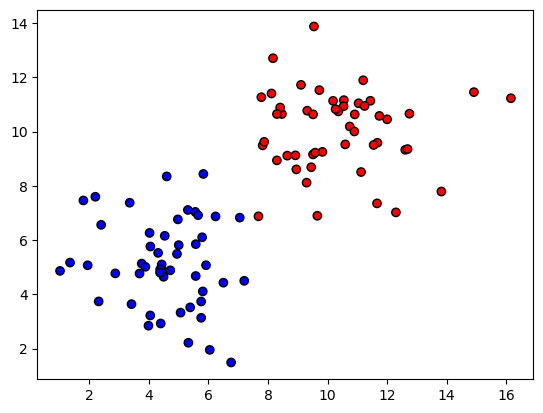

In [8]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr',edgecolor='k')
plt.plot()

P(xtest/y=b) = 1/(2pie)^d/2 * cov^1/2 Exp(((x-u1)cov^-1(x-u1).T)/2)

prediction~ Cov^-1(u1-u0)x + u0Cov^-1u0.T - u1Cov^-1u1.T + log(p/1-p) > >0 ?1:0

Cov is same for Both y=0, and y=1

In [66]:
u1 = X[y==1].mean(axis=0)

In [67]:
u1

array([10.33985583, 10.04486762])

In [68]:
u0 = X[y==0].mean(axis=0)

In [69]:
u0

array([4.55327074, 5.13550586])

In [70]:
X_cen = np.zeros(X.shape)
for i in range(X.shape[0]):
    if y[i] == 1:
        X_cen[i] = X[i] - u1
    else:
        X_cen[i] =X[i] -u0


In [71]:
n = X.shape[0]
C = (X_cen.T@X_cen)/n

In [72]:
C

array([[ 2.72825159, -0.15895384],
       [-0.15895384,  2.35391094]])

In [73]:
inv = np.linalg.inv(C)

In [74]:
inv

array([[0.36798287, 0.02484898],
       [0.02484898, 0.4265029 ]])

In [75]:
P = y[y==1].shape[0]/y.shape[0]

In [76]:
P

0.5

In [88]:
B = -(u1@inv@u1.T - u0@inv@u0.T)/2 + np.log(P/(1-P))

In [89]:
B

-33.749035533049614

In [90]:
W = (u1-u0)@inv

In [91]:
X[0]

array([4.5297377 , 6.15651761])

In [92]:
y[0]

0

In [95]:
val = W@X[0].T + B

In [96]:
val

-9.774861709247183

In [97]:
def predict(X):
    y = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        val = W@X[i].T + B
        if val>0:
            y[i] = 1
        else:
            y[i] =0
    return y

In [98]:
y_preds = predict(X)

In [99]:
np.sum(y_preds != y)

1

In [2]:
class Linear_discriminant_Analysis:
    def __init__(self,prior=0):
        self.prior = prior
    def fit(self,X,y):
        u1 = X[y==1].mean(axis=0)
        u0 = X[y==0].mean(axis=0)
        X_cen = np.zeros(X.shape)
        for i in range(X.shape[0]):
            if y[i] == 1:
                X_cen[i] = X[i] - u1
            else:
                X_cen[i] =X[i] -u0
        self.cov = np.cov(X_cen.T)
        self.inv = np.linalg.inv(self.cov)
        if self.prior == 0:
            self.prior = y[y==1].shape[0]/y.shape[0]
        
        self.B = -(u1@self.inv@u1.T - u0@self.inv@u0.T)/2 + np.log(self.prior/(1-self.prior+1e-9))
        self.W = (u1-u0)@self.inv
    def predict(self,X):
        y = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            val = self.W@X[i].T + self.B
            if val>0:
                y[i] = 1
            else:
                y[i] =0
        return y
            
        
        

In [5]:
X, y = make_blobs(n_samples = 400,
                  n_features=2, 
                  centers=[[5,5],[10,10]],
                  cluster_std=1.5,
                  random_state=2)

In [6]:
X_train,X_test = X[:300,],X[300:]

In [7]:
Y_train,Y_test = y[:300],y[300:]

In [8]:
ld = Linear_discriminant_Analysis(prior=0.5)

In [9]:
ld.fit(X_train,Y_train)

In [10]:
p = y[y==1].shape[0]/y.shape[0]

In [11]:
p

0.5

In [12]:
from sklearn.metrics import classification_report

In [13]:
print(classification_report(Y_train,ld.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       150
           1       0.99      0.99      0.99       150

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [14]:
print(classification_report(Y_test,ld.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        50
           1       0.96      0.98      0.97        50

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



Multi class LDA 

In [15]:
from sklearn.datasets import load_wine

In [16]:
wine = load_wine()

In [17]:
X= wine.data
y = wine.target

In [27]:
n = np.unique(y)[-1]
Us = [0]*(n+1)

In [29]:
for i in np.unique(y):
    m = X[y==i].mean(axis=0)
    Us[i] = m

In [30]:
Us

[array([1.37447458e+01, 2.01067797e+00, 2.45559322e+00, 1.70372881e+01,
        1.06338983e+02, 2.84016949e+00, 2.98237288e+00, 2.90000000e-01,
        1.89932203e+00, 5.52830508e+00, 1.06203390e+00, 3.15779661e+00,
        1.11571186e+03]),
 array([1.22787324e+01, 1.93267606e+00, 2.24478873e+00, 2.02380282e+01,
        9.45492958e+01, 2.25887324e+00, 2.08084507e+00, 3.63661972e-01,
        1.63028169e+00, 3.08661972e+00, 1.05628169e+00, 2.78535211e+00,
        5.19507042e+02]),
 array([1.31537500e+01, 3.33375000e+00, 2.43708333e+00, 2.14166667e+01,
        9.93125000e+01, 1.67875000e+00, 7.81458333e-01, 4.47500000e-01,
        1.15354167e+00, 7.39624998e+00, 6.82708333e-01, 1.68354167e+00,
        6.29895833e+02])]

In [31]:
X_cen = np.zeros(X.shape)

In [34]:
for i in range(X.shape[0]):
    X_cen[i] = X[i] - Us[y[i]] 

In [36]:
X_cen.shape

(178, 13)

In [49]:
np.unique(y).shape[0]

3

In [65]:
Co = (X_cen.T@X_cen)/(X.shape[0] - np.unique(y).shape[0])

In [66]:
Co.shape

(13, 13)

In [67]:
inv_c = np.linalg.inv(Co)

In [68]:
Discrimis = [0]*(n+1)

In [69]:
p = np.bincount(y)

In [70]:
p

array([59, 71, 48], dtype=int64)

In [59]:
preds = np.zeros(X.shape[0])

In [74]:
for i in range(X.shape[0]):
    vals = np.zeros(n+1);
    for j in range(n+1):
        v = -((X[i]-Us[j])@inv_c@(X[i]-Us[j]).T)/2 + np.log(p[j]/y.shape[0])
        vals[j] = v
    cl = np.argmax(vals)
    preds[i] = cl
    

In [61]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



Mean for each class - Us
Shared Covariance - cov
predict: 
discriminats = XCov^-1ui - ui.T@Cov^-1ui/2 + log(prior(i)) for every ith class 
class having max value will be the output 

In [96]:
class LDA:
    def __init__(self,fit_prior=True,prior=0):
        self.fit_prior = fit_prior
        self.prior = prior
    def fit(self,X,y):
        self.n = np.unique(y).shape[0]
        self.Us = [0]*(self.n)
        
        for i in range(n):
            self.Us[i] = X[y==i].mean(axis=0)
        X_cen = np.zeros(X.shape)
        for i in range(X.shape[0]):
            X_cen[i] = X[i] - self.Us[y[i]]
        cov = (X_cen.T@X_cen)/(X.shape[0] - self.n)
        self.inv = np.linalg.inv(cov)
        self.prior = np.bincount(y)
    def predict(self,X):
        preds = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            vals = np.zeros(self.n)
            for j in range(self.n):
                v = -((X[i]-self.Us[j])@self.inv@(X[i]-self.Us[j]).T)/2 
                if self.fit_prior == True:
                    v += np.log(self.prior[j]/np.sum(self.prior))
                vals[j] = v
            cl = np.argmax(vals)
            preds[i] = cl
        return preds
        
        
            
            

In [79]:
wine = load_wine()

In [121]:
X2 = wine.data
y2 = wine.target

In [116]:
ids = X2.shape[0]
rng = np.arange(ids)
np.random.shuffle(rng)


In [112]:
rng

array([ 89,  57,  31,  24,  39, 113, 170, 171, 146, 135,  10, 176,  98,
       162,  85, 103, 156, 175,  43,  30,  17,  36, 125,  71,  25, 140,
        72, 102,  12, 136,  38,  33,  51,  23, 159,  70, 154,  65, 133,
       169,  16,  18, 108,  82,  37, 168, 104,  81, 128,  64,  40, 109,
         5,  79, 115, 116,   9,  59,  44,   7, 123,  94, 145, 118,  88,
       161,  52,  90, 132, 111,   4, 119,  54, 152, 151,  47, 131,  22,
       155, 163, 174, 134, 166, 158,   8, 148, 153, 142,  28,  68, 138,
         6,  86,  26,  74, 126,  15, 160, 164,  95,   1,  21,  78, 105,
        32,  93, 122,  20,   3,  60,  80,  62,  46,  49,  92, 173,  55,
        73, 167, 114,  66, 117,  69, 130,  76, 172, 106, 157,   2, 112,
        34, 144, 129,  19,  84, 149,  67, 120, 141,  48,  14, 107, 150,
        77, 124,  53,  75,  63,  27, 121,  56,  35,  96,  87,  58,  29,
        50,  97, 127,  99, 100, 165,  42,  13, 143,  11,  61, 139,  45,
       147, 137,  83, 101, 110,  91,  41,   0])

In [123]:
Xn = X2[rng]

In [126]:
yn.shape

(178,)

In [125]:
yn = y2[rng]

In [108]:
X2_s.shape

(13,)

In [127]:
X_train,X_test = Xn[:130],Xn[130:]

In [128]:
Y_train,Y_test = yn[:130],yn[130:]

In [129]:
ld = LDA()

In [130]:
ld.fit(X_train,Y_train)

In [131]:
print(classification_report(Y_train,ld.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        52
           2       1.00      1.00      1.00        37

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130



In [132]:
print(classification_report(Y_test,ld.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        18
           1       1.00      0.79      0.88        19
           2       1.00      1.00      1.00        11

    accuracy                           0.92        48
   macro avg       0.94      0.93      0.93        48
weighted avg       0.93      0.92      0.92        48



In [133]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [134]:
lda = LinearDiscriminantAnalysis()

In [135]:
lda.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [136]:
print(classification_report(Y_train,lda.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        52
           2       1.00      1.00      1.00        37

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130



In [137]:
print(classification_report(Y_test,lda.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        11

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48

